In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [2]:
# Load dataset
df = pd.read_csv("music_characteristics_dataset.csv")

In [3]:
# The data
df = df.drop(columns=['id', 'track_name', 'artist_name'])
df.head(5)


,genre,popularity,valence,energy,danceability,acousticness,tempo,speechiness,mode,instrumentalness
0,acoustic,0,0.598,0.572,0.786,0.2930,119.943,0.0590,1,0.00000
1,acoustic,62,0.493,0.721,0.449,0.1660,178.141,0.0392,1,0.00000
2,acoustic,40,0.135,0.467,0.523,0.3110,129.953,0.0281,0,0.00002
3,acoustic,47,0.173,0.591,0.405,0.0153,165.377,0.0339,1,0.00000
4,acoustic,50,0.246,0.267,0.597,0.7930,75.535,0.0309,1,0.00140


In [4]:
data = pd.get_dummies(df)
data.head()

,popularity,valence,energy,danceability,acousticness,tempo,speechiness,mode,instrumentalness,genre_acoustic,...,genre_summer,genre_swedish,genre_synth-pop,genre_tango,genre_techno,genre_trance,genre_trip-hop,genre_turkish,genre_work-out,genre_world-music
0,0,0.598,0.572,0.786,0.2930,119.943,0.0590,1,0.00000,1,...,0,0,0,0,0,0,0,0,0,0
1,62,0.493,0.721,0.449,0.1660,178.141,0.0392,1,0.00000,1,...,0,0,0,0,0,0,0,0,0,0
2,40,0.135,0.467,0.523,0.3110,129.953,0.0281,0,0.00002,1,...,0,0,0,0,0,0,0,0,0,0
3,47,0.173,0.591,0.405,0.0153,165.377,0.0339,1,0.00000,1,...,0,0,0,0,0,0,0,0,0,0
4,50,0.246,0.267,0.597,0.7930,75.535,0.0309,1,0.00140,1,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# Feature names
data.columns.to_list()

['popularity',
 'valence',
 'energy',
 'danceability',
 'acousticness',
 'tempo',
 'speechiness',
 'mode',
 'instrumentalness',
 'genre_acoustic',
 'genre_afrobeat',
 'genre_alt-rock',
 'genre_alternative',
 'genre_ambient',
 'genre_anime',
 'genre_black-metal',
 'genre_bluegrass',
 'genre_blues',
 'genre_bossanova',
 'genre_brazil',
 'genre_breakbeat',
 'genre_british',
 'genre_cantopop',
 'genre_chicago-house',
 'genre_children',
 'genre_chill',
 'genre_classical',
 'genre_club',
 'genre_comedy',
 'genre_country',
 'genre_dance',
 'genre_dancehall',
 'genre_death-metal',
 'genre_deep-house',
 'genre_detroit-techno',
 'genre_disco',
 'genre_disney',
 'genre_drum-and-bass',
 'genre_dub',
 'genre_dubstep',
 'genre_edm',
 'genre_electro',
 'genre_electronic',
 'genre_emo',
 'genre_folk',
 'genre_forro',
 'genre_french',
 'genre_funk',
 'genre_garage',
 'genre_german',
 'genre_gospel',
 'genre_goth',
 'genre_grindcore',
 'genre_groove',
 'genre_grunge',
 'genre_guitar',
 'genre_happy',
 '

In [7]:
# Popularity category of each sample
target = df['popularity'].to_list()

In [10]:
data.iloc[:,0]

0        0
1       62
2       40
3       47
4       50
        ..
3000     0
3001     0
3002     5
3003     0
3004    14
Name: popularity, Length: 3005, dtype: int64

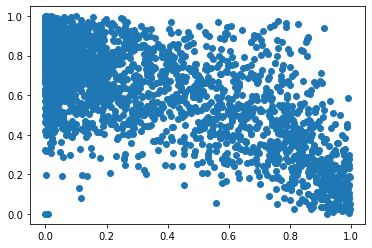

In [44]:
# Plot acousticness by energy
plt.scatter(data.iloc[:,4], data.iloc[:,2])
plt.show()

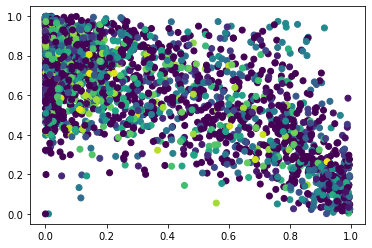

In [45]:
# Color samples by popularity
plt.scatter(data.iloc[:,4], data.iloc[:,2], c=target)
plt.show()

In [46]:
# Scale the data
scaler = StandardScaler()
features_standardized = scaler.fit_transform(data)

In [47]:
# Instantiate the model
dbscan = DBSCAN(eps=0.6, min_samples=5)
dbscan.fit(features_standardized)

DBSCAN(eps=0.6)

In [48]:
# A sample of the DBSCAN cluster labels
labels = dbscan.labels_
labels[::10]

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1

In [49]:
# The model returns no clusters
set(labels)

{-1}

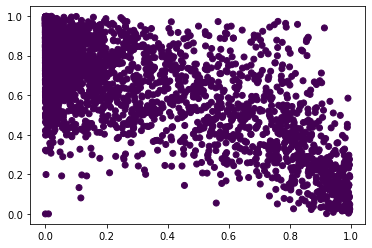

In [52]:
# Plot the results, clustered by DBSCAN
plt.scatter(data.iloc[:,4], data.iloc[:,2], c=labels)
plt.show()

(array([ 89., 114., 150., 157., 242., 290., 356., 462., 547., 598.]),
 array([0.    , 0.0999, 0.1998, 0.2997, 0.3996, 0.4995, 0.5994, 0.6993,
        0.7992, 0.8991, 0.999 ]),
 <BarContainer object of 10 artists>)

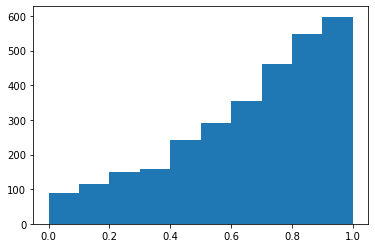

In [51]:
plt.hist(data['energy'])

(array([215., 304., 306., 386., 301., 346., 336., 276., 280., 255.]),
 array([0.    , 0.0985, 0.197 , 0.2955, 0.394 , 0.4925, 0.591 , 0.6895,
        0.788 , 0.8865, 0.985 ]),
 <BarContainer object of 10 artists>)

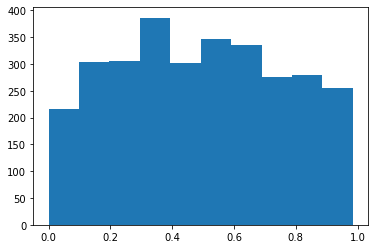

In [31]:
plt.hist(data['valence'])